In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.io import loadmat
import matplotlib.gridspec as gridspec
%matplotlib inline

In [10]:
data = loadmat('data/ex4data1.mat')
weight = loadmat('data/ex4weights.mat')

In [11]:
X = np.c_[np.ones(data['X'].shape[0]), data['X']]
y = data['y']

In [12]:
m, n = X.shape

In [13]:
dims = 10
samples = X[:, 1:][np.random.randint(m, size = dims * dims)]

In [14]:
sns.set_style("dark")

In [15]:
def display_data(samples):
    fig = plt.figure(figsize=(5, 5))
    gs = gridspec.GridSpec(10, 10)
    gs.update(bottom = 0.01, top = 0.99, left = 0.01, right = 0.99, wspace = 0.05, hspace = 0.05)

    k = 0

    for i in range(10):
        for j in range(10):
            ax = plt.subplot(gs[i, j])
            ax.axis('off')
            ax.imshow(samples[k].reshape(int(np.sqrt(n)), int(np.sqrt(n))).T, cmap = plt.get_cmap('Greys'), interpolation = 'nearest')
            k += 1

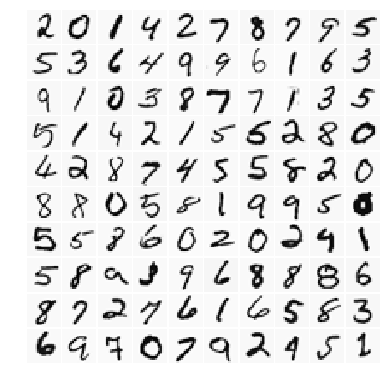

In [16]:
display_data(samples)

In [17]:
theta1, theta2 = weight['Theta1'], weight['Theta2']

In [18]:
sigmoid = lambda z: (1/ (1 + np.exp(-z)))

In [19]:
sigmoid_gradient = lambda z: sigmoid(z) * (1 - sigmoid(z))

In [20]:
def randm_weight_init(inp, out):
    eps = 0.12
    return 2 * eps * np.random.random_sample((out, inp + 1)) - eps

In [46]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmda=0.0):
#     import pdb; pdb.set_trace()
    theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, (input_layer_size + 1))
    theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, (hidden_layer_size + 1)) 
    m, n = X.shape
    y_matrix = pd.get_dummies(y.ravel()).as_matrix() 
    
    a1 = X
    z2 = theta1.dot(a1.T)
    a2 = sigmoid(z2)
    a2 = np.c_[ np.ones((X.shape[0], 1)), a2.T]
    
    z3 = theta2.dot(a2.T)
    a3 = sigmoid(z3)
    
    reg_term = (lmda / (2 * m)) * (np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:])))
    
    J = (-1/m) * np.sum((np.log(a3).T*y_matrix) + np.log(1 - a3).T*(1- y_matrix)) + reg_term
    
    d3 = a3.T - y_matrix
    d2 = theta2[:, 1:].T.dot(d3.T) * sigmoid_gradient(z2)
    
    delta1 = d2.dot(a1)
    delta2 = d3.T.dot(a2)
    
    theta1_ = np.c_[np.ones((theta1.shape[0], 1)), theta1[:, 1:]]
    theta2_ = np.c_[np.ones((theta2.shape[0], 1)), theta2[:, 1:]]
    
    theta1_grad = delta1/m + (theta1_ * lmda)/m
    theta2_grad = delta1/m + (theta1_ * lmda)/m
    
    return J, theta1_grad, theta2_grad

In [38]:
nn_params = np.r_[theta1.ravel(), theta2.ravel()]

In [39]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [40]:
print('theta1 :', theta1.shape)
print('theta2 :', theta2.shape)
print('nn_params :', nn_params.shape)

theta1 : (25, 401)
theta2 : (10, 26)
nn_params : (10285,)


In [47]:
lmda = 0
print(nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmda))

(0.2876291651613189, array([[ 6.18712766e-05,  0.00000000e+00,  0.00000000e+00, ...,
         9.70102410e-09,  2.85541159e-09,  0.00000000e+00],
       [ 9.38798109e-05,  0.00000000e+00,  0.00000000e+00, ...,
         3.22774693e-08, -1.26316319e-10,  0.00000000e+00],
       [-1.92593606e-04,  0.00000000e+00,  0.00000000e+00, ...,
         7.05404498e-08,  1.41584916e-09,  0.00000000e+00],
       ...,
       [ 6.60569302e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -1.40472252e-08,  1.94786057e-09,  0.00000000e+00],
       [ 2.90522062e-04,  0.00000000e+00,  0.00000000e+00, ...,
         5.06149568e-07, -5.54722494e-08,  0.00000000e+00],
       [-6.33753316e-05,  0.00000000e+00,  0.00000000e+00, ...,
         5.05491848e-09,  4.46821993e-09,  0.00000000e+00]]), array([[ 6.18712766e-05,  0.00000000e+00,  0.00000000e+00, ...,
         9.70102410e-09,  2.85541159e-09,  0.00000000e+00],
       [ 9.38798109e-05,  0.00000000e+00,  0.00000000e+00, ...,
         3.22774693e-08, -1.26316

/Users/lality/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [48]:
lmda = 1
print(nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmda))

(0.38376985909092365, array([[ 2.61871277e-04, -2.11248326e-12,  4.38829369e-13, ...,
         7.09042553e-09,  1.84706139e-09,  5.60928898e-13],
       [ 2.93879811e-04,  1.53233736e-12, -1.95174738e-12, ...,
         2.10747891e-08, -8.61281252e-11,  7.08845709e-13],
       [ 7.40639389e-06, -1.75530893e-12,  1.63207553e-12, ...,
         4.63501184e-08,  9.48509834e-10, -1.50133620e-12],
       ...,
       [ 2.66056930e-04, -1.77854412e-12, -1.96393620e-12, ...,
        -9.34100149e-09,  1.29689159e-09,  1.80499812e-12],
       [ 4.90522062e-04,  6.10356747e-14,  5.12122016e-13, ...,
         3.33797620e-07, -3.66032512e-08,  7.67523996e-13],
       [ 1.36624668e-04,  1.77175372e-12, -1.31503028e-13, ...,
         4.69418663e-09,  2.83929031e-09,  1.75890906e-12]]), array([[ 2.61871277e-04, -2.11248326e-12,  4.38829369e-13, ...,
         7.09042553e-09,  1.84706139e-09,  5.60928898e-13],
       [ 2.93879811e-04,  1.53233736e-12, -1.95174738e-12, ...,
         2.10747891e-08, -8.6128

/Users/lality/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [49]:
[sigmoid_gradient(z) for z in [-1, -0.5, 0, 0.5, 1]]

[0.19661193324148185,
 0.2350037122015945,
 0.25,
 0.2350037122015945,
 0.19661193324148185]